In [272]:
import wandb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score


In [ ]:
dataset_path = "../Datasets/WineQT.csv"

random_state = 42
wandb_log = False

In [252]:
lr = 0.01
max_epochs = 15

In [ ]:
# if wandb_log:
#     config = {
#         "lr": lr, 
#         "model_type": "Log_Reg",
#         "num_epochs": max_epochs,
#         "batch_size": batch_size,
#         # "gpu_id": 0,
#         "wandb_run_name": "bhav" ,
#         "tags": ["P3",]
#     }

#     wandb.init(entity = "bhavberi",   # wandb username. (NOT REQUIRED ARG. ANYMORE, it fetches from initial login)
#             project = "SMAI",        # wandb project name. New project will be created if given project is missing.
#             config = config         # Config dict
#             )
#     wandb.run.name = f"{config['optimizer']}_{config['activation']}_{len(config['hidden_layers'])}_{config['lr']}_{config['batch_size']}_{config['num_epochs']}"
#     print(wandb.run.name)

In [ ]:
dataset = pd.read_csv(dataset_path)
dataset.head()

In [ ]:
dataset.describe()

In [ ]:
X = dataset.drop(columns=['quality']).to_numpy()
y = dataset['quality'].to_numpy()

num_classes = 11 # 0-10

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(y, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Labels')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.grid(True)

plt.show()

In [ ]:
# Count number of missing values in each column
missing_values_count = dataset.isnull().sum()

missing_values_count

In [ ]:
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
# To fill in data

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=random_state)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=random_state)

print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_validation.shape, y_validation.shape)
print("Test set shape:", X_test.shape, y_test.shape)

In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_validation_std = scaler.transform(X_validation)
X_test_std = scaler.transform(X_test)

In [ ]:
# class LogisticRegression:
#     def __init__(self, learning_rate=0.01, num_epochs=1000):
#         self.learning_rate = learning_rate
#         self.num_epochs = num_epochs
#         self.weights = None
#         self.bias = None

#     def sigmoid(self, z):
#         return 1 / (1 + np.exp(-z))
    
#     def fit(self, X, y, X_val, y_val):
#         num_samples, num_features = X.shape
#         self.weights = np.zeros(num_features)
#         self.bias = 0
#         train_loss = []
#         val_acc = []

#         for i in range(self.num_epochs):
#             y_predicted = self.sigmoid(np.dot(X, self.weights) + self.bias)

#             dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
#             db = (1 / num_samples) * np.sum(y_predicted - y)

#             self.weights -= self.learning_rate * dw
#             self.bias -= self.learning_rate * db

#             loss = self.loss(y, y_predicted)
#             train_loss.append(loss)

#             y_predicted_val = self.predict(X_val)
#             val_acc.append(self.accuracy(y_val, y_predicted_val))

#             if i % 5 == 0:
#                 print(f'epoch {i} loss {loss} val_acc {val_acc[i]}')
        
#         return train_loss, val_acc
    
#     def predict(self, X):
#         y_predicted = self.sigmoid(np.dot(X, self.weights) + self.bias)
#         y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
#         return np.array(y_predicted_cls)
    
#     def loss(self, y_true, y_pred):
#         loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
#         return loss.mean()
    
#     def accuracy(self, y_true, y_pred):
#         accuracy = np.sum(y_true == y_pred) / len(y_true)
#         return accuracy
    
#     def evaluate(self, X, y):
#         y_pred = self.predict(X)
#         accuracy = self.accuracy(y, y_pred)
#         return accuracy

In [ ]:
# class LogisticRegressionMulticlass:
#     def __init__(self, learning_rate=0.01, num_epochs=1000):
#         self.learning_rate = learning_rate
#         self.num_epochs = num_epochs
#         self.classes = range(num_classes)
#         self.models = {}

#     def fit(self, X, y, X_val, y_val):
#         val_accs = []
#         for class_label in self.classes:
#             binary_y = (y == class_label).astype(int)
#             model = LogisticRegression(learning_rate=self.learning_rate, num_epochs=self.num_epochs)
#             loss, val_acc = model.fit(X, binary_y, X_val, (y_val == class_label).astype(int))
#             self.models[class_label] = model

#             acc = model.accuracy((y_val == class_label).astype(int), model.predict(X_val))
#             print(f'class {class_label} val_acc {acc}')

#             val_accs.append(val_acc)
#         return val_accs
            
#     def predict(self, X):
#         predictions = np.zeros((X.shape[0], len(self.classes)))

#         for class_label, model in self.models.items():
#             predictions[:, class_label] = model.predict(X)

#         predicted_classes = np.argmax(predictions, axis=1)
#         return predicted_classes
    
#     def evaluate(self, X, y):
#         y_pred = self.predict(X)
#         accuracy = self.accuracy(y, y_pred)
#         return accuracy
    
#     def accuracy(self, y_true, y_pred):
#         accuracy = np.sum(y_true == y_pred) / len(y_true)
#         return accuracy
    
#     def plot_acc(self, val_accs):
#         # val_accs is an array of arrays with shape (num_classes, num_epochs)

#         val_accs = np.array(val_accs)
#         plt.figure(figsize=(8, 6))
#         plt.plot(val_accs.mean(axis=0), label='Average Validation Accuracy')
#         plt.title('Validation Accuracy')
#         plt.xlabel('Epoch')
#         plt.ylabel('Accuracy')
#         plt.legend()
#         plt.grid(True)
#         plt.show()

In [269]:
class LogReg:
    def __init__(self, learning_rate=0.01, num_epochs=1000):
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.classes = range(num_classes)
        self.weights = [None,] * num_classes
        self.bias = [None,] * num_classes

        self.val_acc = []
        self.train_acc = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def softmax(self, z):
        return np.exp(z) / np.sum(np.exp(z), axis=0)
    
    def loss(self, y_true, y_pred):
        return -np.sum(y_true * np.log(y_pred)) / len(y_true)
    
    def fit(self, X, y, X_val, y_val):
        num_samples, num_features = X.shape
        self.weights = np.zeros((num_features, num_classes))
        self.bias = np.zeros(num_classes)
        train_loss = []
        self.val_acc = []
        self.train_acc = []

        enc = OneHotEncoder().fit(np.array([[i,] for i in range(num_classes)]))
        y_new = enc.transform(y.reshape(-1, 1)).toarray()
        
        for i in range(self.num_epochs):
            z = self.sigmoid(np.dot(X, self.weights) + self.bias[np.newaxis, :])
            y_predicted = self.softmax(z)

            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y_new))
            db = (1 / num_samples) * np.sum(y_predicted - y_new)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            loss = self.loss(y_new, y_predicted)
            train_loss.append(loss)

            y_predicted_val = self.predict(X_val)
            self.val_acc.append(self.accuracy(y_val, y_predicted_val))
            y_predicted_train = self.predict(X)
            self.train_acc.append(self.accuracy(y, y_predicted_train))

            if (i+1) % 10 == 0:
                print(f'Epoch {i+1} loss: {loss:.4f}')
                print(f'Val Acc: {self.val_acc[-1]*100:.2f} Train Acc: {self.train_acc[-1]*100:.2f}')
        
        return train_loss
    
    def predict(self, X):
        y_predicted = self.softmax(np.dot(X, self.weights) + self.bias[np.newaxis, :])
        y_predicted_cls = np.argmax(y_predicted, axis=1)
        return y_predicted_cls
    
    def accuracy(self, y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy
    
    def evaluate(self, X, y):
        y_pred = self.predict(X)
        accuracy = self.accuracy(y, y_pred)
        return accuracy
    
    def plot_loss(self, train_loss):
        plt.plot(train_loss, label='Training Loss')
        plt.title('Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.show()

    def plot_acc(self):
        plt.plot(self.val_acc, label='Validation Accuracy')
        plt.plot(self.train_acc, label='Train Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.grid(True)
        plt.show()

Epoch 10 loss: 6.8140
Val Acc: 48.25 Train Acc: 51.86
Epoch 20 loss: 6.8099
Val Acc: 48.25 Train Acc: 51.42


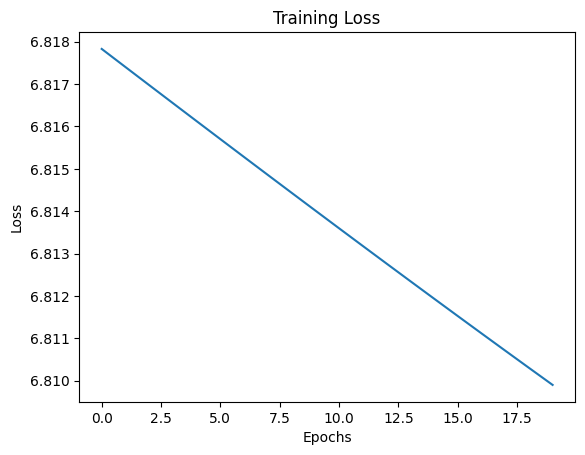

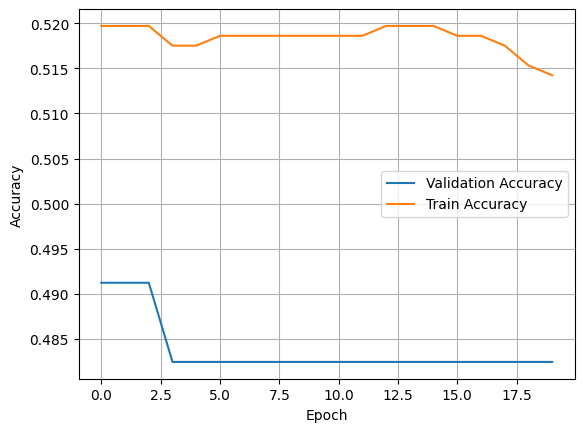

Test Accuracy 58.26086956521739


In [282]:
model = LogReg(learning_rate=0.01, num_epochs=20)
loss = model.fit(X_train_std, y_train, X_validation_std, y_validation)

model.plot_loss(loss)
model.plot_acc()

print("Test Accuracy",model.evaluate(X_test_std, y_test)*100)

In [280]:
sklearn_model = LogisticRegression(max_iter=100)
sklearn_model.fit(X_train_std, y_train)
y_pred = sklearn_model.predict(X_test_std)
print("Test Accuracy",accuracy_score(y_test, y_pred)*100)

print(classification_report(y_test, y_pred, zero_division=0))

Test Accuracy 66.08695652173913
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.70      0.76      0.73        50
           6       0.63      0.61      0.62        44
           7       0.65      0.69      0.67        16
           8       0.00      0.00      0.00         2

    accuracy                           0.66       115
   macro avg       0.40      0.41      0.40       115
weighted avg       0.64      0.66      0.65       115



In [281]:
print(classification_report(y_test, model.predict(X_test_std), zero_division=0))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00         3
           5       0.69      0.76      0.72        50
           6       0.73      0.36      0.48        44
           7       0.37      0.81      0.51        16
           8       0.00      0.00      0.00         2

    accuracy                           0.58       115
   macro avg       0.36      0.39      0.34       115
weighted avg       0.63      0.58      0.57       115



In [ ]:
if wandb_log:
    wandb.finish()